### 

In [1]:

sample_size = 100
x_linear    = rnorm(sample_size, mean = 4, sd = 1)
y_linear    = -4 * x_linear + rnorm(sample_size, mean = 0, sd = 1)



In [2]:
pearson_r = cor(x_linear, y_linear, method = "pearson")
pearson_r

[1] -0.9660921

In [3]:
test_result = cor.test(x_linear, y_linear, method = "pearson")
test_result$estimate
test_result$p.value    
test_result$conf.int 

cor 
-0.9660921

[1] 1.955465e-59

[1] -0.9770980 -0.9499309
attr(,"conf.level")
[1] 0.95

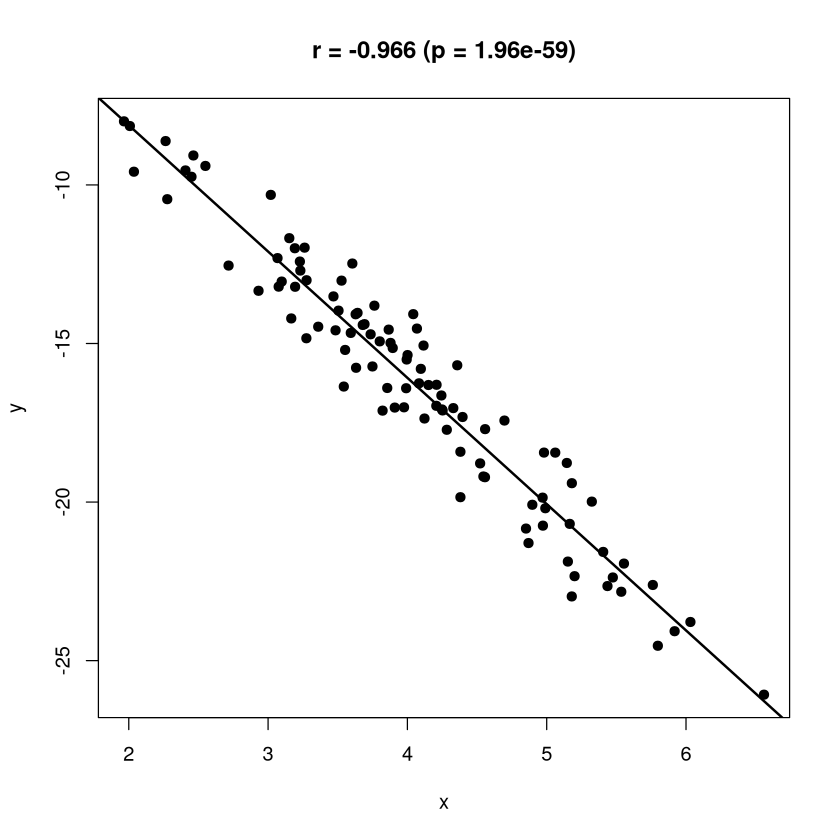

In [4]:

plot(x_linear, y_linear,
     main = sprintf("r = %.3f (p = %.3g)", test_result$estimate, test_result$p.value),
     xlab = "x", ylab = "y", pch = 19)
abline(lm(y_linear ~ x_linear), lwd = 2)


In [5]:

sample_size = 100
x_linear    = rnorm(sample_size, mean = 10, sd = 1)
y_linear1    = -4 * x_linear + rnorm(sample_size, mean = 0, sd = 1) - 40
y_linear2    = 4 * x_linear + rnorm(sample_size, mean = 0, sd = 1)  -40



pearson_r = cor(c(x_linear,x_linear), c(y_linear1,y_linear2), method = "pearson")
pearson_r

[1] 0.001362598

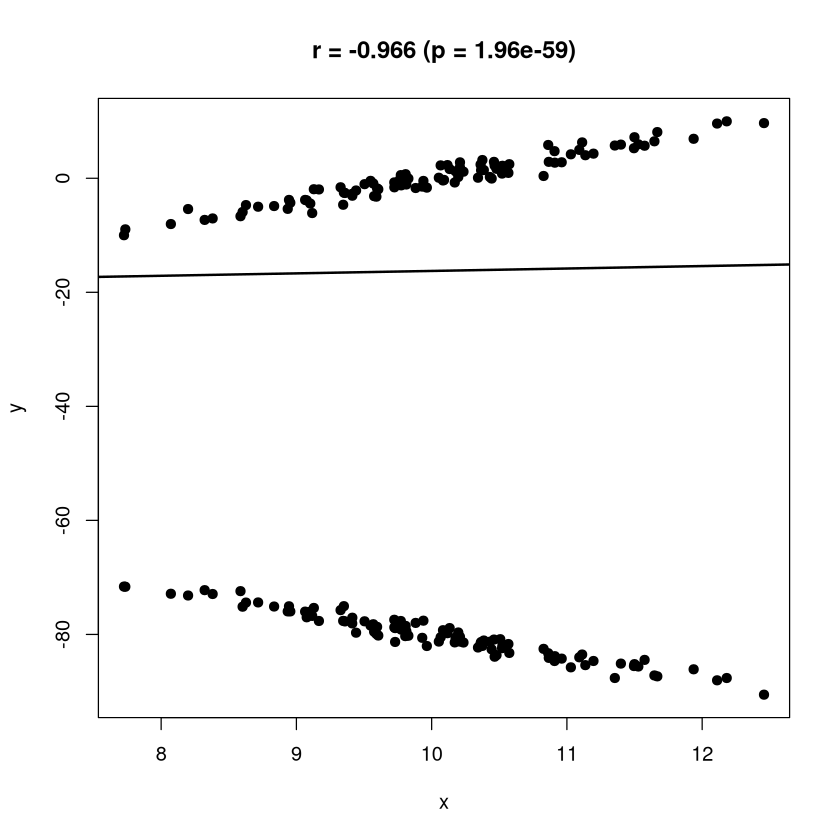

In [6]:

plot(c(x_linear,x_linear), c(y_linear1,y_linear2),
     main = sprintf("r = %.3f (p = %.3g)", test_result$estimate, test_result$p.value),
     xlab = "x", ylab = "y", pch = 19)
abline(lm(y_linear ~ x_linear), lwd = 2)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


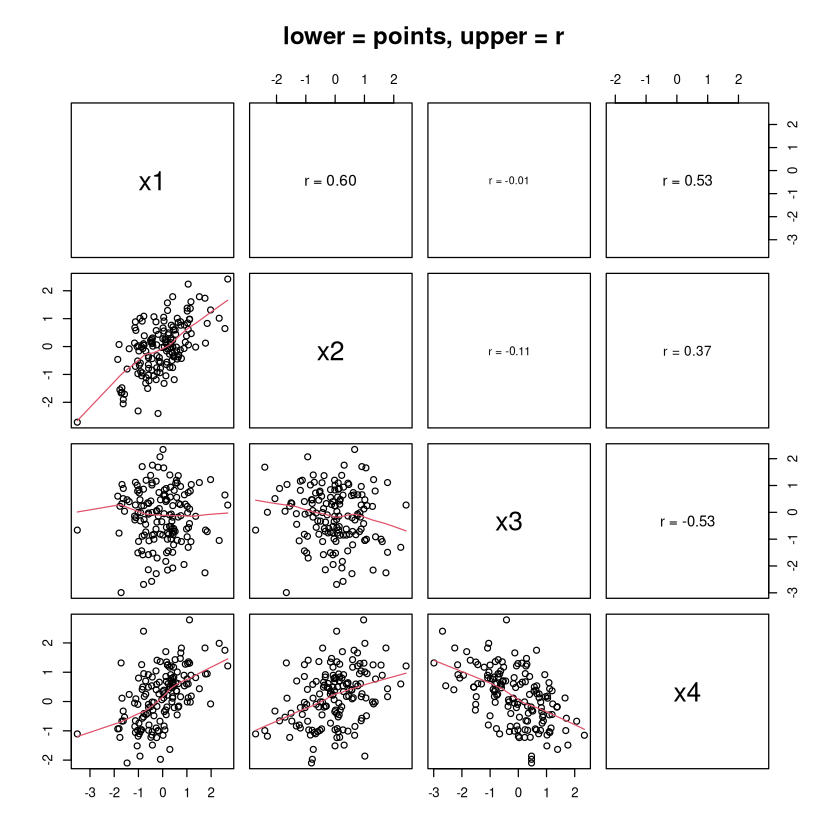

In [7]:
n  = 150
x1 = rnorm(n)
x2 = 0.7 * x1 + rnorm(n, sd = 0.8)
x3 = rnorm(n)
x4 = 0.5 * x1 - 0.5 * x3 + rnorm(n, sd = 0.7)

df_many = data.frame(x1 = x1, x2 = x2, x3 = x3, x4 = x4)

panel_cor = function(x, y, digits = 2, ...) {
  usr = par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r = cor(x, y)
  txt = sprintf("r = %.2f", r)
  cex_val = 0.8 + 0.6 * abs(r)  # scale size by |r|
  text(0.5, 0.5, txt, cex = cex_val)
}

pairs(df_many,
      main = " lower = points, upper = r",
      lower.panel = panel.smooth,
      upper.panel = panel_cor)


            x1         x2          x3         x4
x1  1.00000000  0.5978152 -0.01327547  0.5337200
x2  0.59781517  1.0000000 -0.10983600  0.3736679
x3 -0.01327547 -0.1098360  1.00000000 -0.5312136
x4  0.53371995  0.3736679 -0.53121365  1.0000000


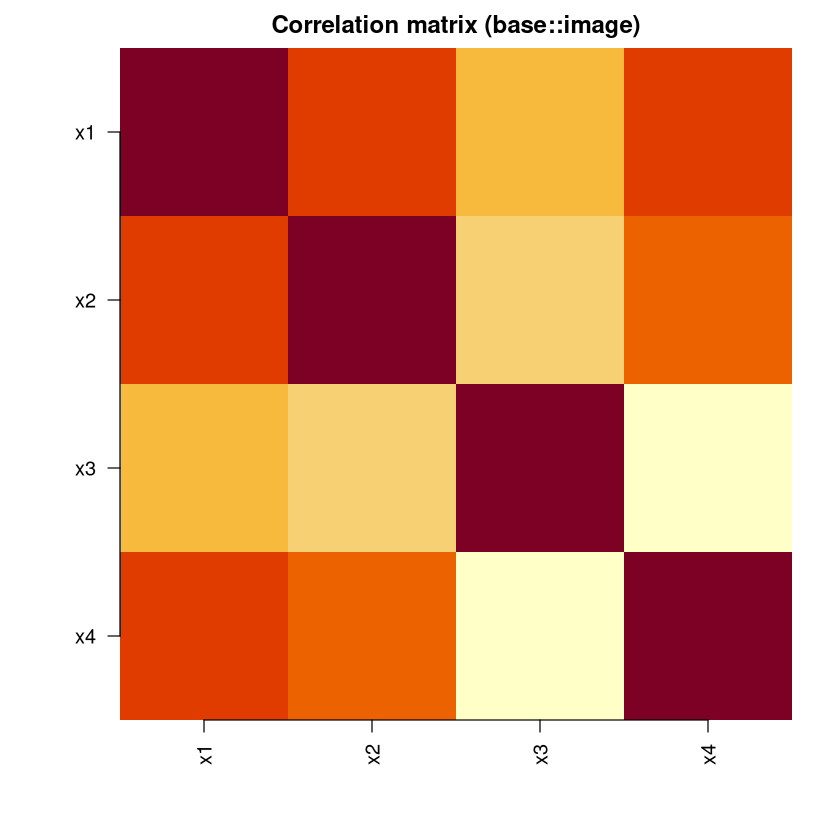

In [8]:
R = cor(df_many)
print(R)

# Basic image with axis labels
op = par(mar = c(5, 5, 2, 2))
image(1:ncol(R), 1:ncol(R), t(R[ncol(R):1, ]),
      axes = FALSE,
      xlab = "", ylab = "", main = "Correlation matrix (base::image)")
axis(1, at = 1:ncol(R), labels = colnames(R), las = 2)
axis(2, at = 1:ncol(R), labels = rev(colnames(R)), las = 2)
par(op)

# Pearson Correlation

The **Pearson correlation coefficient** (denoted $ r $ for a sample or $ \rho $ for a population) measures the **strength and direction of the linear relationship** between two continuous variables.

- **Range:** $-1 \leq r \leq 1$  
  - $ r = 1 $: perfect positive linear relationship  
  - $ r = -1 $: perfect negative linear relationship  
  - $ r = 0 $: no linear relationship  

- **Hypothesis test:**  
  - Null hypothesis: $ H_0 : \rho = 0 $ (no linear correlation)  
  - Alternative hypothesis: $ H_1 : \rho \neq 0 $  

---

## Formula

For two variables $ X = (x_1, \dots, x_n) $ and $ Y = (y_1, \dots, y_n) $:

$
r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}
         {\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \; \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$

where  
- $ \bar{x} $ = mean of $ X $  
- $ \bar{y} $ = mean of $ Y $  

Equivalently, Pearson correlation is:

$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \, \sigma_Y}
$

---

## When to Use

- To quantify the linear association between two quantitative variables.  
- Often applied in exploratory data analysis, regression diagnostics, and feature selection.  
- Be cautious: nonlinear relationships or outliers may mislead Pearson’s $ r $.


# Spearman’s Rank Correlation (ρ)

The **Spearman rank correlation coefficient** (denoted $ \rho $ or $ r_s $) measures the **strength and direction of a *monotonic* relationship** between two variables.  
It is a **non-parametric** alternative to Pearson’s correlation.

- **Range:** $-1 \leq \rho \leq 1$  
  - $ \rho = 1 $: perfect positive monotonic relationship  
  - $ \rho = -1 $: perfect negative monotonic relationship  
  - $ \rho = 0 $: no monotonic relationship  

- **When to use:**  
  - When variables are ordinal, or  
  - When the relationship is monotonic but **not linear**, or  
  - When data contains **outliers** that would distort Pearson’s correlation.

---

## Formula

If $ R(x_i) $ and $ R(y_i) $ are the ranks of $ x_i $ and $ y_i $:

$
\rho = \frac{\text{Cov}(R(X), R(Y))}{\sigma_{R(X)} \, \sigma_{R(Y)}}
$

For the case without ties, this simplifies to:

$
\rho = 1 - \frac{6 \sum_{i=1}^n d_i^2}{n(n^2 - 1)}
$

where  
- $ d_i = R(x_i) - R(y_i) $ (the difference in ranks for each pair)  
- $ n $ = number of observations  

---

## Hypothesis Test

- Null hypothesis: $ H_0 : \rho = 0 $ (no monotonic relationship)  
- Alternative hypothesis: $ H_1 : \rho \neq 0 $  

The test is performed using **Spearman’s rank correlation test**, e.g., in R:

```r
cor.test(x, y, method = "spearman")


In [9]:
x1 = 1:10
y1 = x1^2  # nonlinear but strictly increasing

res1 = cor.test(x1, y1, method = "pearson")
res1$estimate   # pearson
res1$p.value

cor 
0.9745586

[1] 1.777539e-06

In [10]:
x1 = 1:10
y1 = x1^2  # nonlinear but strictly increasing

res1 = cor.test(x1, y1, method = "spearman")
res1$estimate   # Spearman rho
res1$p.value

rho 
  1

[1] 0

In [11]:
x2 = 1:15
y2 = 15:1  # strictly decreasing

res2 = cor.test(x2, y2, method = "spearman")
res2$estimate
res2$p.value

rho 
 -1

[1] 0

In [12]:
x2 = c(1:1000, 10^7)
y2 = c(1:1001)  # strictly decreasing

res2 = cor.test(x2, y2, method = "pearson")
res2$estimate
res2$p.value

cor 
0.05562955

[1] 0.07854298

In [13]:
x2 = c(1:1000, 10^7)
y2 = c(1:1001)  # strictly decreasing

res2 = cor.test(x2, y2, method = "spearman")
res2$estimate
res2$p.value

rho 
  1

[1] 0

In [14]:
x3 = rnorm(30)
y3 = rnorm(30)

res3 = cor.test(x3, y3, method = "spearman")
res3$estimate
res3$p.value

rho 
0.04249166

[1] 0.8233715

In [15]:
x3 = c(1,2,3,4,5,6,7, 5)
y3 = c(1,2,3,4,5,6,7, 5)

res3 = cor.test(x3, y3, method = "spearman")
res3$estimate
res3$p.value

Warning message in cor.test.default(x3, y3, method = "spearman"):
“Cannot compute exact p-value with ties”


rho 
  1

[1] 0

# Kendall’s Tau (τ)

The **Kendall rank correlation coefficient** (denoted $ \tau $) measures the **strength and direction of a monotonic relationship** between two variables.  
It is a **non-parametric** statistic based on the number of **concordant** and **discordant** pairs in the data.

- **Range:** $-1 \leq \tau \leq 1$  
  - $ \tau = 1 $: perfect agreement (all pairs concordant)  
  - $ \tau = -1 $: perfect disagreement (all pairs discordant)  
  - $ \tau = 0 $: no association  

---

## Formula

For $ n $ data pairs $(x_i, y_i)$:  

- A pair $(x_i, y_i), (x_j, y_j)$ is **concordant** if the ranks agree:  
  $(x_i - x_j)(y_i - y_j) > 0$  

- A pair is **discordant** if the ranks disagree:  
  $(x_i - x_j)(y_i - y_j) < 0$  

Let  
- $ C $ = number of concordant pairs  
- $ D $ = number of discordant pairs  

Then Kendall’s tau is:

$
\tau = \frac{C - D}{\tbinom{n}{2}}
$

where $ \tbinom{n}{2} $ is the total number of pairwise comparisons.

---

## Hypothesis Test

- Null hypothesis: $ H_0 : \tau = 0 $ (no monotonic association)  
- Alternative hypothesis: $ H_1 : \tau \neq 0 $  

In R, use:

```r
cor.test(x, y, method = "kendall")


In [16]:
x1 = 1:10
y1 = x1 * 2  # perfectly monotonic increasing

res1 = cor.test(x1, y1, method = "kendall")
res1$estimate   # Kendall's tau
res1$p.value 

tau 
  1

[1] 5.511464e-07

In [17]:
x3 = c(1,2,3,4,5,6,7)
y3 = c(1,2,3,4,5,6,7)

res3 = cor.test(x3, y3, method = "kendall")
res3$estimate
res3$p.value

tau 
  1

[1] 0.0003968254

In [18]:
x3 = c(1,2,3,4,5,6,7, 5)
y3 = c(1,2,3,4,5,6,7, 5)

res3 = cor.test(x3, y3, method = "kendall")
res3$estimate
res3$p.value

Warning message in cor.test.default(x3, y3, method = "kendall"):
“Cannot compute exact p-value with ties”


tau 
  1

[1] 0.0006944512

In [19]:
x2 = 1:10
y2 = 10:1  # strictly decreasing

res2 = cor.test(x2, y2, method = "kendall")
res2$estimate
res2$p.value

tau 
 -1

[1] 5.511464e-07

In [20]:
x3 = 1:20
y3 = log(x3)  # increasing, but nonlinear

res3 = cor.test(x3, y3, method = "kendall")
res3$estimate
res3$p.value

tau 
  1

[1] -4.440892e-16

In [21]:
x4 = rnorm(30)
y4 = rnorm(30)

res4 = cor.test(x4, y4, method = "kendall")
res4$estimate
res4$p.value

tau 
-0.2045977

[1] 0.1169881